# Licence Plate Blurring

Working with pretrained model, License Plate Detector

In [4]:
import os
from ultralytics import YOLO 
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
model_best_path = "C:/Users/santi/Desktop/PROGRAMACION/COMPUTER VISION/Projects/License Plate Detector/yolo-license-plate-detection/runs/detect/train/weights/best.pt"
model = YOLO(model_best_path)

In [7]:
image_name = "FOTO_2.jpg"
image_path = "C:/Users/santi/Desktop/PROGRAMACION/COMPUTER VISION/Projects/Licence Plate Blur/"
image_path_complete = os.path.join(image_path,image_name)

def image_licence_blur(image_path_complete):
    result = model.predict(image_path_complete,visualize=True ,conf=0.25,augment=True)
    for r in result:
        boxes = r.boxes.xyxy.cpu().numpy()
        r.show()
    print(boxes)

    image = cv2.imread(image_path_complete)

    if boxes is not None:
        for b in boxes:
            x1,y1,x2,y2 = b[0],b[1],b[2],b[3]
            x1 = int(x1)
            y1 = int(y1)
            x2 = int(x2)
            y2 = int(y2)
            image = cv2.rectangle (image,(x1,y1),(x2,y2), (255,0,0), 5)
            image[y1:y2,x1:x2, :]= cv2.blur(image[y1:y2,x1:x2, :],(50,50))
    plt.imshow(image)

    output_path = "C:/Users/santi/Desktop/PROGRAMACION/COMPUTER VISION/Projects/Licence Plate Blur/Test/"
    cv2.imwrite(os.path.join(output_path, image_name),image)
    return "Image Processed"

In [127]:
video_name = "VIDEO_1.mp4"
video_path = "C:/Users/santi/Desktop/PROGRAMACION/COMPUTER VISION/Projects/Licence Plate Blur/"
video_path_complete = os.path.join(video_path,video_name)
output_path = "C:/Users/santi/Desktop/PROGRAMACION/COMPUTER VISION/Projects/Licence Plate Blur/Test/"

def video_licence_blur(video_path_complete):
    cap = cv2.VideoCapture(video_path_complete)
    scores = []

    # Information of output video
    fps = 25  # Fotogramas por segundo
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')  # Codec de video
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # Ancho del frame
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) # Alto del frame
    out = cv2.VideoWriter(os.path.join(output_path, "output.mp4"), fourcc, fps, (width, height))

    while cap.isOpened():
        # Read a frame from the video
        success, frame = cap.read()
        # If any video is being reading
        if success:
            # Run model
            result = model.predict(frame,visualize=True ,conf=0.20,augment=True)
            for r in result:
                boxes = r.boxes.xyxy.cpu().numpy()

            if boxes is not None:
                for box in boxes:
                    x1, y1, x2, y2 = map(int, box)
                    frame = cv2.rectangle (frame,(x1,y1),(x2,y2), (255,0,0), 5)
                    frame[y1:y2,x1:x2, :]= cv2.blur(frame[y1:y2,x1:x2, :],(50,50))
            out.write(frame)

        else:
            break

    # Release resources
    cap.release()
    out.release()
    return "Video Processed"

In [128]:
video_licence_blur(video_path_complete)


0: 416x640 1 LicensePlate, 120.0ms
Speed: 3.0ms preprocess, 120.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 LicensePlate, 110.0ms
Speed: 6.0ms preprocess, 110.0ms inference, 7.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 LicensePlate, 44.0ms
Speed: 7.0ms preprocess, 44.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 LicensePlate, 45.0ms
Speed: 1.0ms preprocess, 45.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 LicensePlates, 45.0ms
Speed: 2.0ms preprocess, 45.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 2 LicensePlates, 42.0ms
Speed: 2.0ms preprocess, 42.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 LicensePlate, 43.0ms
Speed: 1.0ms preprocess, 43.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 LicensePlate, 43.0ms
Speed: 2.0ms preprocess, 43.0ms inf

'Video Processed'


image 1/1 C:\Users\santi\Desktop\PROGRAMACION\COMPUTER VISION\Projects\Licence Plate Blur\FOTO_2.jpg: 448x640 2 LicensePlates, 61.0ms
Speed: 3.0ms preprocess, 61.0ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)
[[      865.2      478.29      1074.3         647]
 [     570.23      419.27      710.37      528.44]]


'Image Processed'

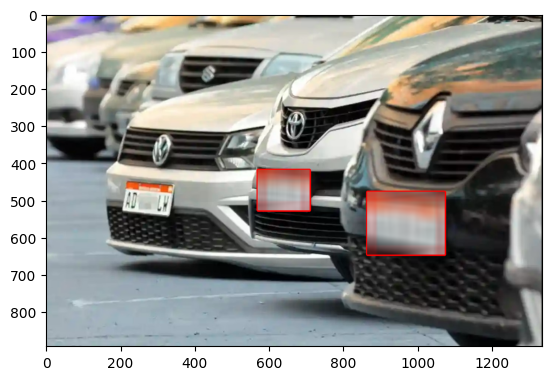

In [8]:
image_licence_blur(image_path_complete)